In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

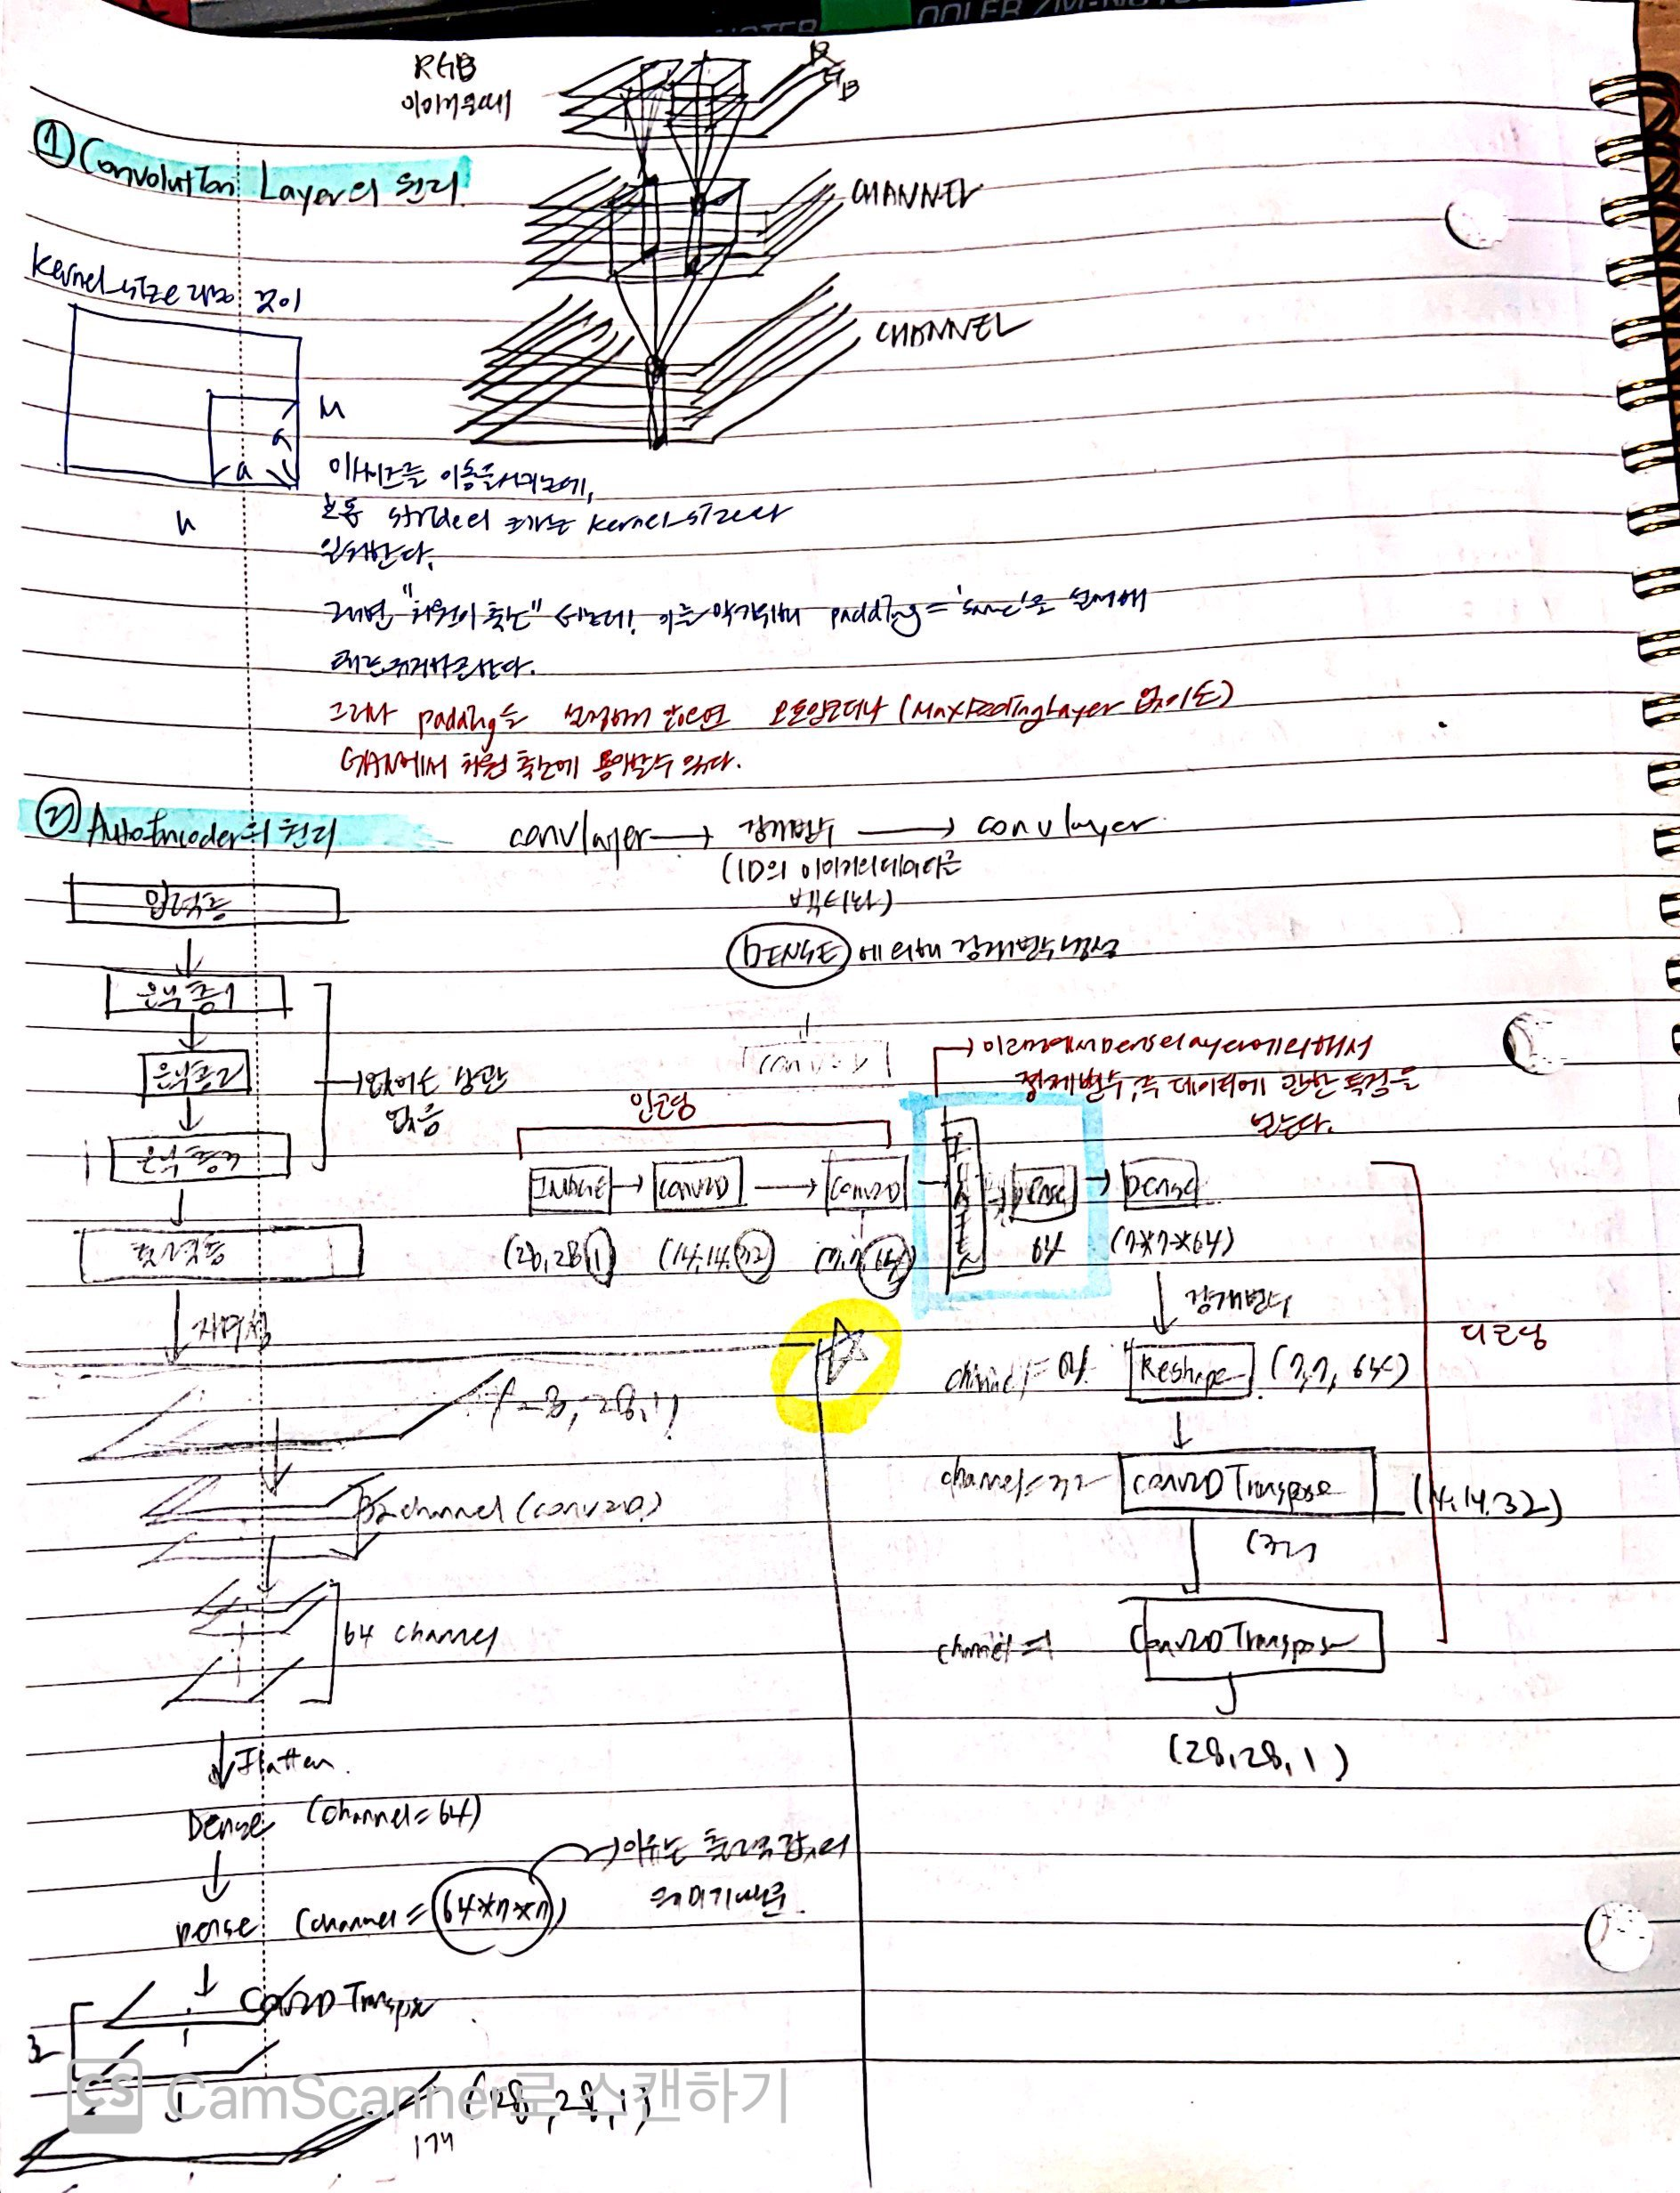

### AutoEncoder
- 기존에 사용하던 신경망의 학습은 지도 학습으로, 입력한 값에 대한 출력을 학습한 뒤에 학습 과정에서 본 적 없던 새로운 입력에 대한 출력을 정확하게 예측하는 방법이었다.
- 반면에 이 방법은 입력에 대한 다른 출력값을 요구하는 것이 아니라 입력값을 그대로 출력하는 데에 목적을 둔다.
- 인코더, 잠재 변수, 디코더의 구조를 갖는데, 일적으로 동일한 데이터를 대칭되는 구조로 쌓아 올린다.  

1. Encoder(인코더)
    - 컨볼루션 신경망에서 본 특징 추출기의 역할을 한다.
    - 컨볼루션 신경망의 특징 추출기는 입력 이미지에서 특징을 추출해 이를 1차원의 벡터로 만드는 역할을 한다.
        - 이 1차원의 벡터가 바로 잠재 변수이다.
2. Decoder(디코더)
    - 이 잠재 변수에 입력 데이터가 압축이 되어 있기 때문에 이를 다시 해석해서 출력 데이터를 만드는 것이 디코더의 역할이다.

오토 인코더는 손실 압축을 진행하기 때문에 누락되는 부분이 있을 수 밖에 없지만, 그만큼 압축하는 과정에서(압축률을 높이는 과정에서) 입력 데이터의 특징을 더 잘 추출한다는 특징이 있다.

**이외의 GAN은 생성자에서 랜덤하게 생성된 변수를 잠재 변수처럼 활용해서 전혀 새로운 이미지를 만들게 된다.**  

**간단하게 FashionMNIST 데이터로 학습해 보자**

In [3]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [5]:
train_x[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [16]:
train_x = (train_x/255.0).reshape(-1,28*28)

In [17]:
test_x = (test_x/255.0).reshape(-1,28*28)

In [18]:
train_x.shape, test_x.shape

((60000, 784), (10000, 784))

- 일단은 심층 신경망인 Dense layer에 넣을 것이므로 이미지 데이터의 차원을 1차원으로 줄였다.

In [39]:
from tensorflow.keras.layers import Dense, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, sigmoid, selu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import mse, binary_crossentropy

In [43]:
model = Sequential()
train_x = train_x.reshape(-1,28,28)
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(100, activation = 'selu', input_shape = (784,)))
model.add(Dense(30, activation = 'selu'))
model.add(Dense(100, activation = 'selu', input_shape = (30,)))
model.add(Dense(28*28, activation = 'sigmoid'))
model.add(Reshape([28,28]))

model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.SGD(1.5))
model.fit(train_x, train_x, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 159us/sample - loss: 0.0086
Epoch 2/10
60000/60000 [==============================] - 7s 119us/sample - loss: 1.3505e-05
Epoch 3/10
60000/60000 [==============================] - 7s 120us/sample - loss: 6.9868e-06
Epoch 4/10
60000/60000 [==============================] - 7s 115us/sample - loss: 4.6025e-06
Epoch 5/10
60000/60000 [==============================] - 7s 117us/sample - loss: 3.3796e-06
Epoch 6/10
60000/60000 [==============================] - 7s 114us/sample - loss: 2.6394e-06
Epoch 7/10
60000/60000 [==============================] - 7s 113us/sample - loss: 2.1439e-06
Epoch 8/10
60000/60000 [==============================] - 7s 114us/sample - loss: 1.7888e-06
Epoch 9/10
60000/60000 [==============================] - 7s 114us/sample - loss: 1.5245e-06
Epoch 10/10
60000/60000 [==============================] - 7s 116us/sample - loss: 1.3216e-06


In [37]:
model.evaluate(test_x, test_x, verbose = 0)

3.171756699157413e-06

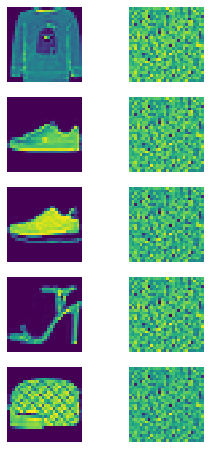

In [45]:
import random
test_x = test_x.reshape(-1,28,28)
pred = model.predict(test_x)
plt.figure(figsize = (4,8))
for i in range(5):
    plt.subplot(5,2,i*2+1)
    rand_idx= random.randint(0, test_x.shape[0])
    plt.imshow(test_x[rand_idx].reshape(28,28))
    plt.axis('off')
    
    plt.subplot(5,2,i*2+2)
    plt.imshow(pred[rand_idx].reshape(28,28))
    plt.axis('off')
plt.show()

**Dense layer만으로 정말 간단한 오토인코더를 만들었더니 성능이 너무 안좋다. 그렇기 때문에 여기에 convolution layer을 추가해 보고자 한다.**  

- 그러기 위해서는 x_train과 x_test의 차원을 다시 2차원으로 바꾸어야 한다.

In [46]:
from tensorflow.keras.layers import Conv2D, Flatten, Reshape, Conv2DTranspose
train_x, test_x = train_x.reshape(-1,28,28,1), test_x.reshape(-1,28,28,1)

In [47]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (2,2), strides = 2, activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = (2,2), strides = 2, activation = 'relu'))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(7*7*64, activation = 'relu'))
model.add(Reshape([7,7,64]))
model.add(Conv2DTranspose(filters = 32, kernel_size = (2,2), strides = 2, activation = 'relu', padding = 'same'))
model.add(Conv2DTranspose(filters = 1, kernel_size = (2,2), strides = 2, activation = 'sigmoid', padding = 'same'))

In [48]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_3 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                200768    
_________________________________________________________________
dense_21 (Dense)             (None, 3136)              203840    
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 32)       

In [50]:
model.compile(loss = 'mse', optimizer = 'adam')
model.fit(train_x, train_x, epochs = 20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 26s 437us/sample - loss: 1.1251e-10
Epoch 2/20
60000/60000 [==============================] - 25s 418us/sample - loss: 5.2460e-12
Epoch 3/20
60000/60000 [==============================] - 26s 436us/sample - loss: 2.7039e-12
Epoch 4/20
60000/60000 [==============================] - 25s 423us/sample - loss: 1.8134e-12
Epoch 5/20
60000/60000 [==============================] - 26s 436us/sample - loss: 1.3630e-12
Epoch 6/20
60000/60000 [==============================] - 27s 451us/sample - loss: 1.0910e-12 - loss: 1.09
Epoch 7/20
60000/60000 [==============================] - 26s 432us/sample - loss: 9.1032e-13
Epoch 8/20
60000/60000 [==============================] - 26s 426us/sample - loss: 7.8035e-13
Epoch 9/20
60000/60000 [==============================] - 27s 443us/sample - loss: 6.8306e-13
Epoch 10/20
60000/60000 [==============================] - 28s 465us/sample - loss: 6.0681e-13
Epoch 11/20
60000/60000

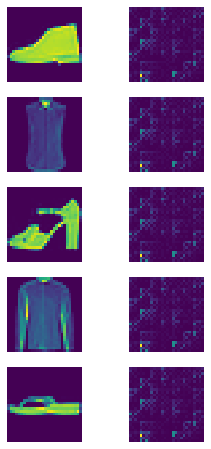

In [51]:
import random
pred = model.predict(test_x)
plt.figure(figsize = (4,8))
for i in range(5):
    plt.subplot(5,2,i*2+1)
    rand_idx= random.randint(0, test_x.shape[0])
    plt.imshow(test_x[rand_idx].reshape(28,28))
    plt.axis('off')
    
    plt.subplot(5,2,i*2+2)
    plt.imshow(pred[rand_idx].reshape(28,28))
    plt.axis('off')
plt.show()

**솔직히 형체도 잘 드러나지 않는다. 너무 적은 epoch로 학습을 시켰을 수도 있고 모델 자체의 성능이 좋지 않을 수도 있다고 생각한다.**

- 혹은 출력층의 활성화 함수로서 이용한 relu가 문제일 수 있는데, relus는 양수이면 그대로 반환하고 0이나 음수가 들어오면 0을 반환하기 때문에 뉴런의 계산 값중에서 음수가 되는 결과가 많을 경우 그 뉴렁늬 출력은 무조건 0이 되는 문제가 발생한다.
    - 이렇게 출력이 0이 되는 것이 문제인 이유는 출력이 다음 레이어의 가중치에 곱해지기 때문에 가중치의 효과를 모두 0을 만든다는 것이다.
    - 편향도 물론 더해지겠지만 편향이 0이거나 음수라면 ReLU activation function을 통과한 다음 레이어의 값도 0이 될 것이다.

- 따라서 음수 부분이 나올 때의 기울기를 미세하게 주어서 출력값이 0이 될 일은 없도록 하는 활성화 함수인 elu를 사용하기로 했다.


In [64]:
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.fashion_mnist.load_data()
train_x, test_x = train_x/255, test_x/255
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

In [65]:
train_x[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [66]:
train_x, test_x = train_x.reshape(-1,28,28,1), test_x.reshape(-1,28,28,1)
from tensorflow.keras.activations import elu
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (2,2), strides = 2, activation = 'elu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = (2,2), strides = 2, activation = 'elu'))
model.add(Flatten())
model.add(Dense(64, activation = 'elu'))
model.add(Dense(7*7*64, activation = 'elu'))
model.add(Reshape(target_shape = (7,7,64)))
model.add(Conv2DTranspose(filters = 32, kernel_size = (2,2), strides = 2, activation = 'elu', padding = 'same', input_shape = (7,7,64)))
model.add(Conv2DTranspose(filters = 1, kernel_size = (2,2), strides = 2, activation = 'sigmoid', padding = 'same'))

- Flatten layer뒤의 첫번째 Dense layer은 위의 CNN layer에서 추출한 데이터를 이용해 얻은 특징 정보를 추출하는데 쓰이고, 이후에 7x7x64의 unit을 생성한 Dense layer로 은닉층 역할이 되면 이후에 이를 다시 차원을 늘려줄 decoding Convolution layer에 넣어서 원하는 입력의 크기와 같은 크기를 출력하게 된다.

In [67]:
train_x[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [68]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 14, 14, 32)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 64)          8256      
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)                200768    
_________________________________________________________________
dense_27 (Dense)             (None, 3136)              203840    
_________________________________________________________________
reshape_7 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 14, 14, 32)      

In [69]:
model.compile(loss = 'mse', optimizer = 'adam',metrics = ['accuracy'])
model.fit(train_x, train_x, epochs = 20, batch_size = 256)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 20s 335us/sample - loss: 0.0388 - accuracy: 0.4984
Epoch 2/20
60000/60000 [==============================] - 20s 327us/sample - loss: 0.0158 - accuracy: 0.5075
Epoch 3/20
60000/60000 [==============================] - 19s 315us/sample - loss: 0.0130 - accuracy: 0.5083
Epoch 4/20
60000/60000 [==============================] - 19s 311us/sample - loss: 0.0115 - accuracy: 0.5086
Epoch 5/20
60000/60000 [==============================] - 19s 310us/sample - loss: 0.0107 - accuracy: 0.5087
Epoch 6/20
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0101 - accuracy: 0.5088
Epoch 7/20
60000/60000 [==============================] - 19s 311us/sample - loss: 0.0097 - accuracy: 0.5089
Epoch 8/20
60000/60000 [==============================] - 19s 314us/sample - loss: 0.0094 - accuracy: 0.5090
Epoch 9/20
60000/60000 [==============================] - 18s 308us/sample - loss: 0.0091 - accuracy: 0.5

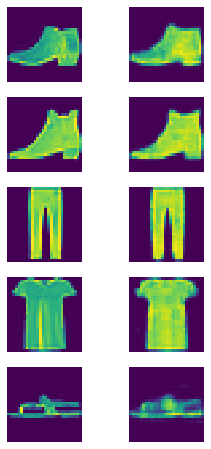

In [70]:
test_x = test_x.reshape(-1,28,28,1)
import random
pred = model.predict(test_x)
plt.figure(figsize = (4,8))
for i in range(5):
    plt.subplot(5,2,i*2+1)
    rand_idx= random.randint(0, test_x.shape[0])
    plt.imshow(test_x[rand_idx].reshape(28,28))
    plt.axis('off')
    
    plt.subplot(5,2,i*2+2)
    plt.imshow(pred[rand_idx].reshape(28,28))
    plt.axis('off')
plt.show()

- 사실 아까 이미지 데이터의 정규화가 잘못된 듯 하다.
- 아마 255로 두번 나누었다 보니까 계속 올바르지 않은 답이 나왔다.  

**결국에 최종적으로 학습시킨 오토인코더는 성공적인 결과를 출력했다**

- 웬만해서는 batch_size를 설정해서 학습을 좀더 빨리 할 수 있도록 하자. 설정하면 한번에 하나씩의 데이터가 아닌 batch_size만큼 뭉터기로 하기 때문이다.